<a href="https://colab.research.google.com/github/Jubair1667/Personal-Finance-Analyzer/blob/main/PP01_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 5

Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 6
Enter savings goal name: Mess fair
Enter goal amount: 500
Enter goal deadline (YYYY-MM-DD): 2026-12-15

Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 8


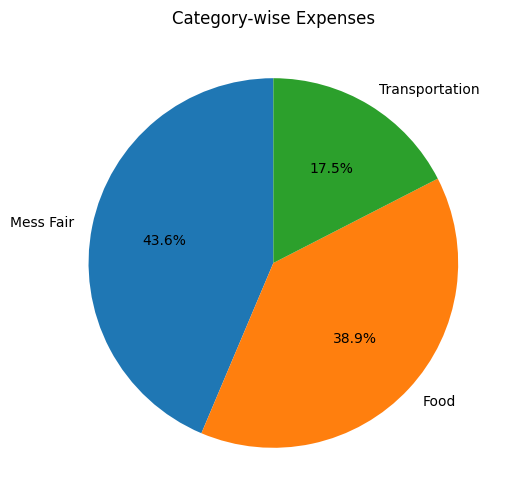

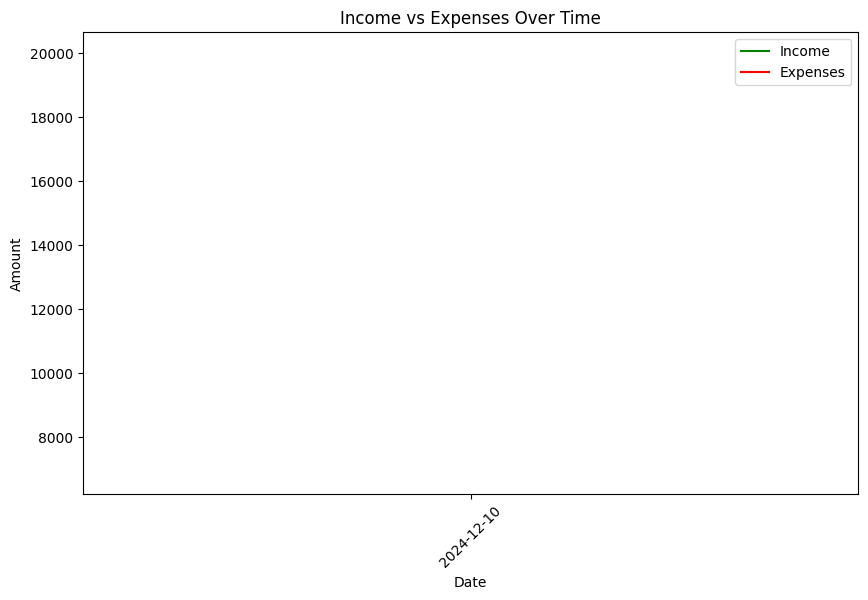


Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 6
Enter savings goal name: Food
Enter goal amount: 600
Enter goal deadline (YYYY-MM-DD): 2026-12-18

Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 8


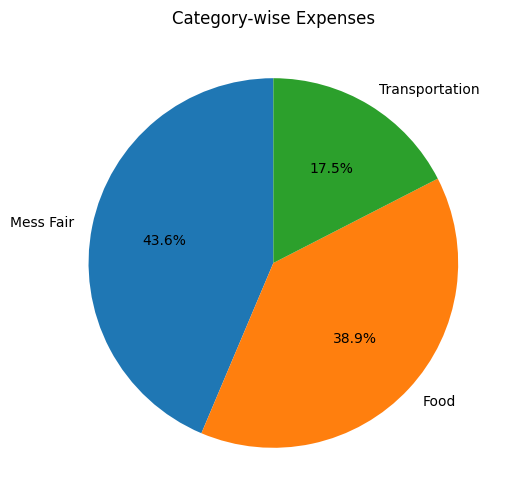

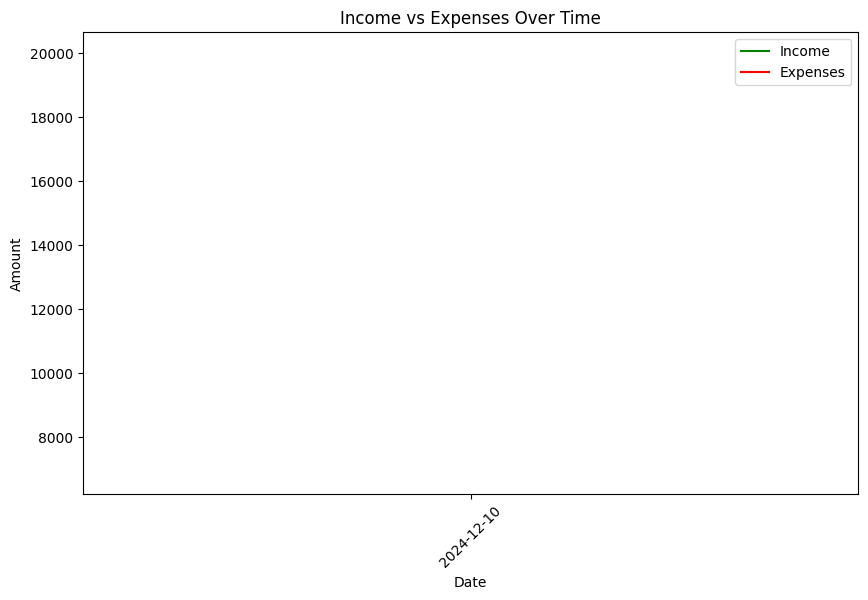


Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Financial Summary
4. Set Budget
5. Check Budget
6. Set Savings Goal
7. Update Savings Goal
8. Generate Visualizations
9. Exit
Enter choice: 9


In [3]:
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt

# File for storing data
DATA_FILE = 'financial_data.csv'
BUDGET_FILE = 'budget_limits.csv'
SAVINGS_GOALS_FILE = 'savings_goals.csv'

# Helper function to ensure the CSV file exists and has headers
def initialize_csv_file():
    if not os.path.exists(DATA_FILE):
        with open(DATA_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Type", "Category", "Date", "Amount"])

# Initialize budget and savings files if they don't exist
def initialize_budget_file():
    if not os.path.exists(BUDGET_FILE):
        with open(BUDGET_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Category", "Monthly Limit"])

def initialize_savings_goals_file():
    if not os.path.exists(SAVINGS_GOALS_FILE):
        with open(SAVINGS_GOALS_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Goal", "Amount", "Deadline", "Current Savings"])

# Helper function to read CSV data
def read_csv(file):
    with open(file, mode='r') as f:
        reader = csv.reader(f)
        data = list(reader)[1:]  # Skip header row
    return data

# Add income or expense entry to the CSV file
def log_transaction(transaction_type, category, amount):
    date_str = datetime.now().strftime("%Y-%m-%d")
    with open(DATA_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([transaction_type, category, date_str, amount])

# Calculate financial summary
def generate_summary():
    data = read_csv(DATA_FILE)
    total_income = 0
    total_expenses = 0
    category_expenses = {}

    for row in data:
        transaction_type, category, _, amount = row
        amount = float(amount)
        if transaction_type == "Income":
            total_income += amount
        elif transaction_type == "Expense":
            total_expenses += amount
            if category in category_expenses:
                category_expenses[category] += amount
            else:
                category_expenses[category] = amount

    net_savings = total_income - total_expenses
    category_percentages = {category: (expense / total_expenses) * 100 for category, expense in category_expenses.items()}

    return total_income, total_expenses, net_savings, category_percentages

# Budget Planning: Set and track monthly spending limits
def set_budget(category, limit):
    with open(BUDGET_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([category, limit])

def check_budget():
    data = read_csv(DATA_FILE)
    budget_data = read_csv(BUDGET_FILE)

    # Create a dictionary of budget limits
    budget_limits = {row[0]: float(row[1]) for row in budget_data}

    category_expenses = {}
    for row in data:
        transaction_type, category, _, amount = row
        if transaction_type == "Expense":
            amount = float(amount)
            if category in category_expenses:
                category_expenses[category] += amount
            else:
                category_expenses[category] = amount

    # Notify if budget is exceeded
    for category, total_expense in category_expenses.items():
        if category in budget_limits and total_expense > budget_limits[category]:
            print(f"Warning: You have exceeded your budget for {category} by {total_expense - budget_limits[category]:.2f}")

# Savings Goals: Set goals and track progress
def set_savings_goal(goal, amount, deadline):
    with open(SAVINGS_GOALS_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([goal, amount, deadline, 0])

def update_savings_goal(goal, current_savings):
    data = read_csv(SAVINGS_GOALS_FILE)
    updated_data = []

    for row in data:
        if row[0] == goal:
            row[3] = float(row[3]) + current_savings
        updated_data.append(row)

    with open(SAVINGS_GOALS_FILE, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Goal", "Amount", "Deadline", "Current Savings"])
        writer.writerows(updated_data)

# Visualization: Pie chart for category-wise expenses and Line chart for income vs. expenses over time
def generate_visualizations():
    data = read_csv(DATA_FILE)
    category_expenses = {}
    income_over_time = []
    expense_over_time = []
    dates = []

    for row in data:
        transaction_type, category, date, amount = row
        amount = float(amount)
        if transaction_type == "Expense":
            if category in category_expenses:
                category_expenses[category] += amount
            else:
                category_expenses[category] = amount
        # Handle income vs. expenses over time
        if date not in dates:
            dates.append(date)
            income_over_time.append(0)
            expense_over_time.append(0)
        if transaction_type == "Income":
            income_over_time[dates.index(date)] += amount
        elif transaction_type == "Expense":
            expense_over_time[dates.index(date)] += amount

    # Pie chart for category-wise expenses
    plt.figure(figsize=(6, 6))
    plt.pie(category_expenses.values(), labels=category_expenses.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Category-wise Expenses')
    plt.show()

    # Line chart for income vs. expenses over time
    plt.figure(figsize=(10, 6))
    plt.plot(dates, income_over_time, label='Income', color='g')
    plt.plot(dates, expense_over_time, label='Expenses', color='r')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title('Income vs Expenses Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Console-based menu for the user interface
def display_menu():
    while True:
        print("\nPersonal Finance Analyzer")
        print("1. Add Income")
        print("2. Add Expense")
        print("3. View Financial Summary")
        print("4. Set Budget")
        print("5. Check Budget")
        print("6. Set Savings Goal")
        print("7. Update Savings Goal")
        print("8. Generate Visualizations")
        print("9. Exit")

        choice = input("Enter choice: ")

        if choice == '1':
            category = input("Enter income category: ")
            amount = float(input("Enter income amount: "))
            log_transaction("Income", category, amount)
        elif choice == '2':
            category = input("Enter expense category (e.g., Food, Transport): ")
            amount = float(input("Enter expense amount: "))
            log_transaction("Expense", category, amount)
        elif choice == '3':
            total_income, total_expenses, net_savings, category_percentages = generate_summary()
            print(f"\nTotal Income: {total_income}")
            print(f"Total Expenses: {total_expenses}")
            print(f"Net Savings: {net_savings}")
            for category, percentage in category_percentages.items():
                print(f"{category}: {percentage:.2f}%")
        elif choice == '4':
            category = input("Enter expense category: ")
            limit = float(input("Enter monthly budget limit: "))
            set_budget(category, limit)
        elif choice == '5':
            check_budget()
        elif choice == '6':
            goal = input("Enter savings goal name: ")
            amount = float(input("Enter goal amount: "))
            deadline = input("Enter goal deadline (YYYY-MM-DD): ")
            set_savings_goal(goal, amount, deadline)
        elif choice == '7':
            goal = input("Enter savings goal to update: ")
            current_savings = float(input("Enter current savings added: "))
            update_savings_goal(goal, current_savings)
        elif choice == '8':
            generate_visualizations()
        elif choice == '9':
            break
        else:
            print("Invalid choice! Please try again.")

# Run the program
initialize_csv_file()
initialize_budget_file()
initialize_savings_goals_file()
display_menu()
